This notebook loads the Mountains data set and generates various charts using _Matplotlib_.

In [37]:
from Mountains_2 import load_mountains2
import matplotlib.pyplot as plt

Load mountains data set using the load_mountains2 method. It returns two maps:
- first associating each country iso (key) with a list of objects standing each for one mountain (value). Each object has a field "name" giving the name of the mountain and a field "elevation" giving the numerical elevation, in meters, if one exists. If the elevation data is not available, the "elevation" field will be *None*.
- second is associating each country iso (key) with the country's full name (value).

In [38]:
from itertools import islice

mountains_map, countries_map = load_mountains2("mountains_db.tsv")
# print a small sample of countries and mountains from the dataset.
for key, value in islice(mountains_map.items(), 10):
    print(f"{key} -> {len(value)} mountains")

ABW -> 3 mountains
GIN -> 42 mountains
ASM -> 9 mountains
UMI-84 -> 1 mountains
HND -> 24 mountains
HTI -> 16 mountains
GUY -> 94 mountains
HRV -> 79 mountains
HKG -> 43 mountains
HMD -> 22 mountains


Generate a bar chart, showing for each country (X-axis) the number of mountains located in that country (Y-axis).

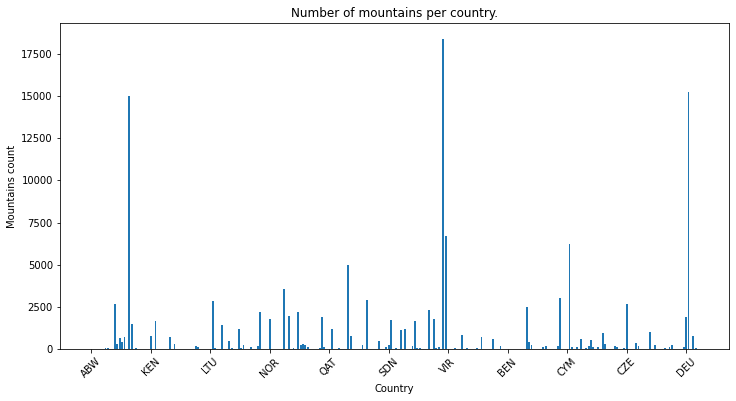

In [39]:
def countByCountry(mountains_map, x_frequency):
    plt.figure(figsize=(12, 6))
    plt.title("Number of mountains per country.")
    plt.xlabel("Country")
    plt.ylabel("Mountains count")
    plt.xticks(ticks=range(0, len(mountains_map), x_frequency), labels=list(mountains_map.keys())[::x_frequency], rotation=45)
    plt.bar(mountains_map.keys(), [len(mountains) for mountains in mountains_map.values()])
    plt.show()

countByCountry(mountains_map, 25)

<u>Challenge 1</u>: Obviously many countries have very few mountains. Only a few have a great number of peaks. Let's restrict the graph to only the countries having more than 1000 peaks

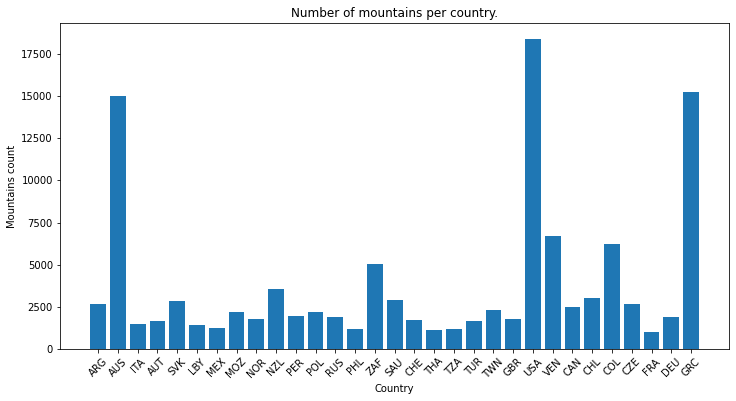

In [40]:
top_mountains_map = {iso : mountains for iso, mountains in mountains_map.items() if len(mountains) > 1000 }
countByCountry(top_mountains_map, 1)

<u>Challenge_2</u>: The set of countries having a more substatial data set is still large. Let's sort it in the reverse order and print _topN_ countries having the largest number of mountains.

In [41]:
topN = 10
mountains_counts = [ {"iso":iso, "count":len(mountains)} for iso, mountains in mountains_map.items() ]
mountains_counts.sort(key=lambda x : x["count"], reverse=True)
top_mountains_counts = mountains_counts[:topN]
lines = [f'{mountain["iso"]} -> {mountain["count"]} mountains' for mountain in top_mountains_counts]
print("\n".join(lines))


USA -> 18393 mountains
GRC -> 15253 mountains
AUS -> 15009 mountains
VEN -> 6684 mountains
COL -> 6209 mountains
ZAF -> 5020 mountains
NZL -> 3561 mountains
CHL -> 3031 mountains
SAU -> 2918 mountains
SVK -> 2834 mountains


Generate a plot chart listing each country iso (X-axis) with the maximum elevation in that country (Y-axis).

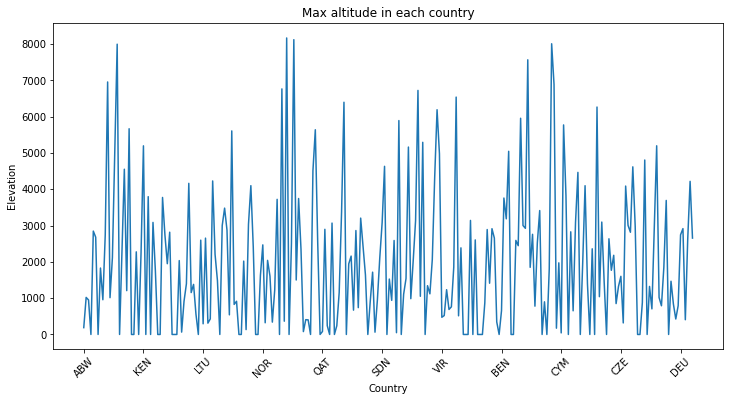

In [42]:
def get_elevations_map(mountains_map):
    elevations_map = {}
    for iso, mountains in mountains_map.items():
        elevations = [mountain["elevation"] for mountain in mountains if mountain["elevation"]]
        elevations_map[iso] = max(elevations, default=0)
    return elevations_map

elevations_map = get_elevations_map(mountains_map)
plt.figure(figsize=(12, 6))
plt.title("Max altitude in each country")
plt.xlabel("Country")
plt.ylabel("Elevation")
plt.xticks(ticks=range(0, len(mountains_map), 25), labels=list(mountains_map.keys())[::25], rotation=45)
plt.plot(elevations_map.keys(), elevations_map.values())
plt.show()

<u>Challenge_3</u>: Lets plot the topN countries in the descending order of their max altitude. We should see countries which geographically are neighbors should be closer to each other in the graph.

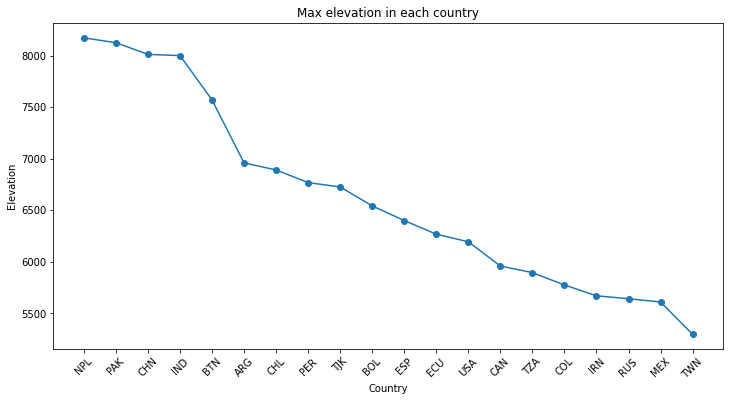

In [58]:
topN = 20
elevations_map = get_elevations_map(mountains_map)
elevations_set = [{"iso":iso, "elevation":elevation} for iso, elevation in elevations_map.items()]
elevations_set.sort(key=lambda x : x["elevation"], reverse=True)
iso_set = [mountain["iso"] for mountain in elevations_set]
elevations_set = [mountain["elevation"] for mountain in elevations_set]
plt.figure(figsize=(12, 6))
plt.title("Max elevation in each country")
plt.xlabel("Country")
plt.ylabel("Elevation")
plt.xticks(ticks=range(0,topN,1), labels=iso_set[:topN:1], rotation=45)
plt.plot(iso_set[:topN], elevations_set[:topN], marker="o")
plt.show()


Generate a box (whiskers) chart showing the world-wide distributions of elevations, per quartile.

Min random: 0
Median random: 1573.0
Max random: 8172


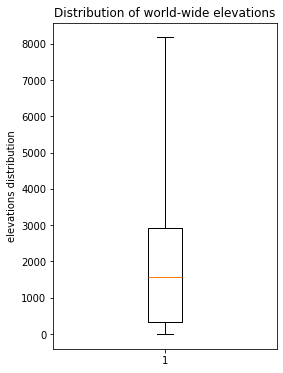

In [59]:
import statistics

plt.figure(figsize=(4, 6))
plt.title("Distribution of world-wide elevations")
plt.ylabel("elevations distribution")
plt.boxplot(elevations_set, whis=[0, 100]);
# print min, median and max
print(f"Min random: {min(elevations_set)}")
print(f"Median random: {statistics.median(elevations_set)}")
print(f"Max random: {max(elevations_set)}")